In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

In [33]:
city_ride_df = pd.merge(city_data_to_load, ride_data_to_load, on="city")
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [34]:
type_city = city_ride_df.groupby('city')['type'].count()
type_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: type, dtype: int64

In [35]:
fare = city_ride_df.groupby('city')["fare"].mean()
fare.max()

43.278333333333336

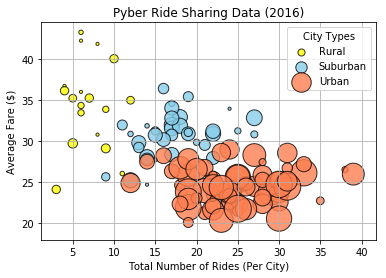

In [38]:
rural = city_ride_df.loc[(city_ride_df['type'] == "Rural")]
type_city_rural = rural.groupby(['city'])['type'].count()
fare_rural = rural.groupby(['city']).mean()['fare']
driver_rural = rural.groupby(['city'])['driver_count'].mean()

suburban = city_ride_df.loc[(city_ride_df['type'] == "Suburban")]
type_city_suburban = suburban.groupby(['city'])['type'].count()
fare_suburban = suburban.groupby(['city']).mean()['fare']
driver_suburban = suburban.groupby(['city'])['driver_count'].mean()

urban = city_ride_df.loc[(city_ride_df['type'] == "Urban")]
type_city_urban = urban.groupby(['city'])['type'].count()
fare_urban = urban.groupby(['city']).mean()['fare']
driver_urban = urban.groupby(['city'])['driver_count'].mean()

#type_city = city_ride_df.groupby('city')['type'].count()
#fare = city_ride_df.groupby('city')["fare"].mean()
#driver = city_ride_df.groupby('city')['driver_count'].sum()

plt.scatter(type_city_rural, fare_rural, s = driver_rural*10, c='yellow', alpha=0.80, edgecolors='black', label = "Rural")
plt.scatter(type_city_suburban, fare_suburban, s = driver_suburban*10, c='skyblue', alpha=0.80, edgecolors='black', label = "Suburban")
plt.scatter(type_city_urban, fare_urban, s = driver_urban*10, c='coral', alpha=0.80, edgecolors='black', label = "Urban")

#ax.axis([0, 45, 16, 45])
#fig.canvas.draw()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(title = 'City Types')
plt.grid(True)
plt.savefig("Pyber Scatter.png")
#plt.figtext("Note: Circle size correlates with driver count per city.")

plt.show()


In [7]:
fares = city_ride_df.groupby('type')['fare'].sum()
fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

Text(0.5,1,'Total Fares by City Type')

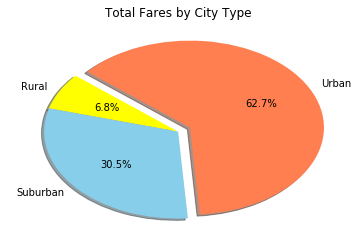

In [8]:
#Total Fares by City Type Pie Chart
labels = ["Rural", "Suburban", "Urban"]
fares = city_ride_df.groupby('type')['fare'].sum()
colors = ["yellow", "skyblue", "coral"]
explode = [0, 0, .1]
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares by City Type")
plt.savefig("fares by city.png")
#plt.axis("equal")

Text(0.5,1,'Total Rides by City Type')

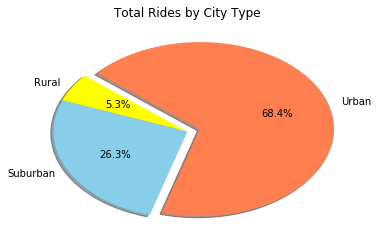

In [9]:
#Total Rides by City Type Pie Chart
labels = ["Rural", "Suburban", "Urban"]
rides = city_ride_df.groupby('type')['ride_id'].count()
colors = ["yellow", "skyblue", "coral"]
explode = [0, 0, .1]
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides by City Type")
plt.savefig("rides by city.png")
#plt.axis("equal")

Text(0.5,1,'Total Drivers by City Type')

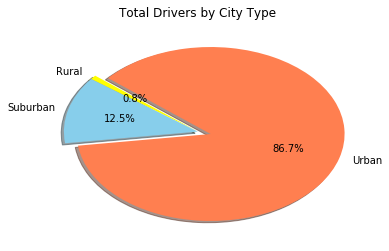

In [10]:
#Total Drivers by City Type Pie Chart
labels = ["Rural", "Suburban", "Urban"]
drivers = city_ride_df.groupby('type')['driver_count'].sum()
#drivers = 100 * city_ride_df.groupby(["type"]).sum()["driver_count"] / city_ride_df["driver_count"].sum()
colors = ["yellow", "skyblue", "coral"]
explode = [0, 0, .1]
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Drivers by City Type")
plt.savefig("drivers by city.png")
#plt.axis("equal")

In [11]:
#Notes

#type(insert name) tells you type

#Below example of multiple data that is color coded, but the markers are the same size
#import numpy as np
#import matplotlib.pyplot as plt
 
# Create data
#N = 60
#g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
#g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
#g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))
 
#data = (g1, g2, g3)
#colors = ("red", "green", "blue")
#groups = ("coffee", "tea", "water") 
 
# Create plot
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
#for data, color, group in zip(data, colors, groups):
    #x, y = data
    #ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
#plt.title('Matplot scatter plot')
#plt.legend(loc=2)
#plt.show()

#Below shows example of marker sizes changed
#import numpy as np
#import matplotlib.pyplot as plt

# Fixing random state for reproducibility
#np.random.seed(19680801)


#N = 50
#x = np.random.rand(N)
#y = np.random.rand(N)
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.show()

#plt.close('all')

# Generate some data :
#N = 25
#x = np.random.rand(N) + 0.5
#y = np.random.rand(N) + 0.5
#r = np.random.rand(N)/10

# Plot the data :
#fig = plt.figure(facecolor='white', figsize=(7, 7))
#ax = fig.add_subplot(111, aspect='equal')
#ax.grid(True)
#scat = ax.scatter(x, y, s=0, alpha=0.5, clip_on=False)
#ax.axis([0, 2, 0, 2])

# Draw figure :
#fig.canvas.draw()

# Calculate radius in pixels :
#rr_pix = (ax.transData.transform(np.vstack([r, r]).T) -
          #ax.transData.transform(np.vstack([np.zeros(N), np.zeros(N)]).T))
#rpix, _ = rr_pix.T

# Calculate and update size in points:
#size_pt = (2*rpix/fig.dpi*72)**2
#scat.set_sizes(size_pt)

# Save and show figure:
#fig.savefig('scatter_size_axes.png')
#plt.show()


#d = pd.read_csv('sealevel.csv')
#year = d['YEAR']
#sea_levels = d['CSIRO_SEALEVEL_INCHES']
#plt.scatter(year, sea_levels, edgecolors='r')
#plt.xlabel('Year')
#plt.ylabel('Sea Level (inches)')
#plt.title('Rise in Sealevel')
#plt.show()